# seed connectivity
post hoc analysis

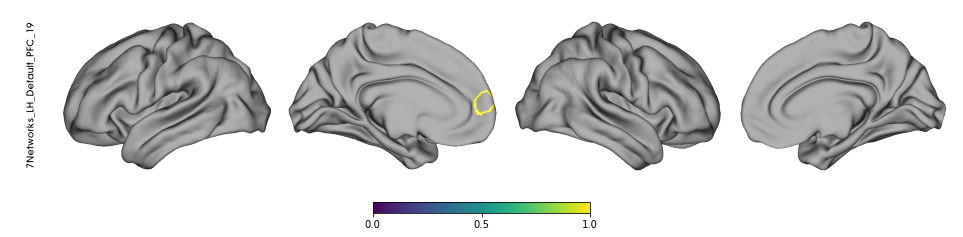

In [3]:
from gradecc.plot.utils import spot_region
from gradecc.plot import plot_cortex

sample_region = '7Networks_LH_Default_PFC_19'
plot_cortex(spot_region(sample_region),
           text=sample_region, as_outline=True)

In [4]:
from gradecc.seed_conn import seed_connectivity, seed_average

df_seed = seed_connectivity(sample_region)
df_seed_avg = seed_average(df_seed)

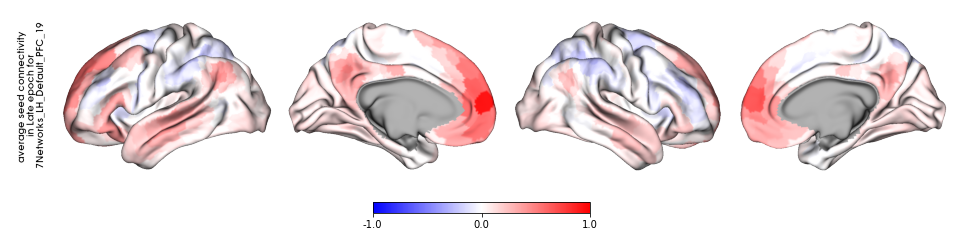

In [5]:
text = 'average seed connectivity \n in Late epoch for \n' + sample_region
plot_cortex(df_seed_avg.loc[sample_region, 'late'],
           color_range=(-1, 1), color_map='bwr', text=text)

## pairwise t-tests seed

In [6]:
from gradecc.stats.pairwise_ttests import seed_ttests

df_seed_shift = seed_ttests(df_seed)
df_seed_shift

Computing ttests...


100%|██████████| 998/998 [00:11<00:00, 89.01it/s]


region     tstat  pvalue_corrected
A        B                                                          
baseline early  7Networks_LH_Cont_Cing_1 -1.387946          0.503109
         early  7Networks_LH_Cont_Cing_2 -1.797372          0.114373
         early  7Networks_LH_Cont_Cing_3 -2.983938          0.011475
         early  7Networks_LH_Cont_Cing_4 -1.480772          0.428404
         early  7Networks_LH_Cont_Cing_5 -1.944946          0.137491
...                                  ...       ...               ...
early    late        7Networks_RH_Vis_79 -0.927486          0.534916
         late         7Networks_RH_Vis_8 -0.732468          0.466136
         late        7Networks_RH_Vis_80 -1.126165          0.513577
         late        7Networks_RH_Vis_81 -0.740514          0.849002
         late         7Networks_RH_Vis_9 -1.218852          0.340005

[2994 rows x 3 columns]

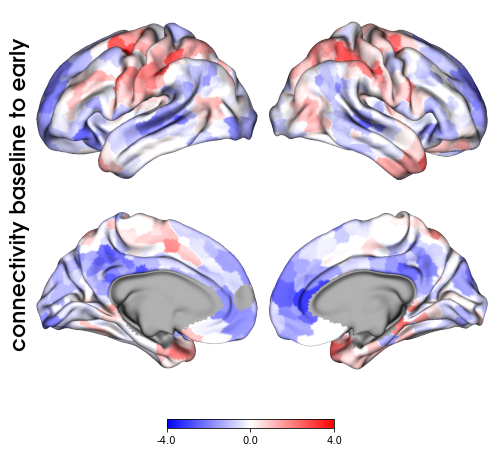

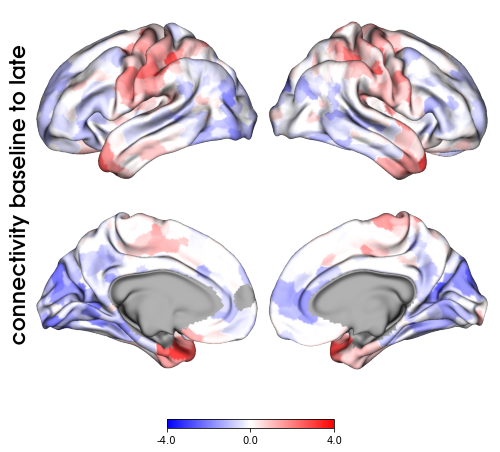

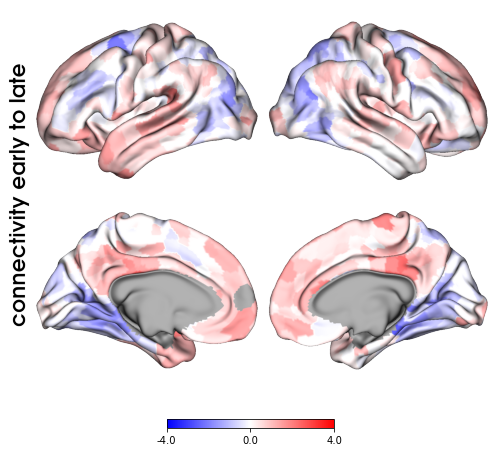

In [7]:
for pair in df_seed_shift.index.unique():
    text = 'connectivity ' + pair[0] + ' to ' + pair[1]
    plot_cortex(df_seed_shift.loc[pair], 'tstat',
           text=text, color_range=(-4, 4), color_map='bwr', layout='grid', save_figure=True)

In [8]:
text = 'connectivity shift of \n' + sample_region + '\n from Baseline to Early'

# plot_brain(df_seed_shift_, 'tstat', color_range=(-4, 4), color_map='bwr', text=text)

In [9]:
# plot_brain(df_seed_shift_, 'tstat', 'pvalue_corrected',
#                   color_range=(-4, 4), color_map='bwr', text=text + ' - significant')